<a href="https://colab.research.google.com/github/arlenkim/study/blob/main/55C3_US_RFR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from warnings import filterwarnings
filterwarnings('ignore')
%config InlineBackend.figure_format="retina"
matplotlib.rcParams['figure.figsize'] = (6,4)
matplotlib.rcParams.update({'font.size': 13})

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Colab Notebooks'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/content/drive/MyDrive/Colab Notebooks/11-15.ipynb의 사본
/content/drive/MyDrive/Colab Notebooks/11-15.ipynb
/content/drive/MyDrive/Colab Notebooks/b52_Regression.ipynb의 사본
/content/drive/MyDrive/Colab Notebooks/wine.ipynb
/content/drive/MyDrive/Colab Notebooks/mushroom.ipynb의 사본
/content/drive/MyDrive/Colab Notebooks/car_evaluation.csv
/content/drive/MyDrive/Colab Notebooks/car_evaluation.ipynb의 사본
/content/drive/MyDrive/Colab Notebooks/55C3_US_3rd_data.csv
/content/drive/MyDrive/Colab Notebooks/b56_DT_RF_Boost_Reg.ipynb의 사본
/content/drive/MyDrive/Colab Notebooks/55C3_US_RFR.ipynb의 사본 (1)
/content/drive/MyDrive/Colab Notebooks/55C3_US_RFR.ipynb의 사본
/content/drive/MyDrive/Colab Notebooks/Untitled0.ipynb
/content/drive/MyDrive/Colab Notebooks/55C3_US_RFR.ipynb
/content/drive/MyDrive/Colab Notebooks/65C3_US_RFR.ipynb
/content/drive/MyDrive/Colab Notebooks/mushroom.ipynb


In [2]:
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.svm import SVC, SVR
from lightgbm import LGBMClassifier, LGBMRegressor
from sklearn import tree
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error,r2_score               
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

In [ ]:
import matplotlib.font_manager as fm

font_list = fm.findSystemFonts(fontpaths = None, fontext = 'ttf')
font_list[:]

['/usr/share/fonts/truetype/liberation/LiberationSerif-Bold.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSans-BoldItalic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationMono-Italic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-BoldItalic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSerif-Italic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Regular.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationMono-Bold.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationMono-BoldItalic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Bold.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSerif-Regular.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSerif-BoldItalic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSans-Italic.ttf',
 '/usr/share/fonts/truetype/humor-sans/Humor-Sans.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSans-Regular.ttf',
 '/usr/share/fonts/truetype/liberation

In [130]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 11 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (6,898 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

In [4]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

In [273]:
# DATA 다운
df = pd.read_csv("https://raw.githubusercontent.com/arlenkim/study/main/55C3_US_3rd_data_new2.csv",encoding='euc-kr',header=1)

In [274]:
# view dimensions of dataset

df.head(5)

,라인,작업일자,순번,생성일시,모델번호,모델코드,모델이름,바코드,최종공정,선택,작업일시,탱크온도,호스온도,노즐온도,작업일시.1,작업일시.2,작업횟수,1:압력,1:시간,1:진폭,1:주파수,1:에너지,1:최대출력,1:사용여부,1:평균출력1,1:평균출력2,1:평균출력3,2:압력,2:시간,2:진폭,2:주파수,2:에너지,2:최대출력,2:사용여부,2:평균출력1,2:평균출력2,2:평균출력3,3:압력,3:시간,3:진폭,3:주파수,3:에너지,3:최대출력,3:사용여부,3:평균출력1,3:평균출력2,3:평균출력3,4:압력,4:시간,4:진폭,4:주파수,4:에너지,4:최대출력,4:사용여부,4:평균출력1,4:평균출력2,4:평균출력3,5:압력,5:시간,5:진폭,5:주파수,5:에너지,5:최대출력,5:사용여부,5:평균출력1,5:평균출력2,5:평균출력3,6:압력,6:시간,6:진폭,6:주파수,6:에너지,6:최대출력,6:사용여부,6:평균출력1,6:평균출력2,6:평균출력3,7:압력,7:시간,7:진폭,7:주파수,7:에너지,7:최대출력,7:사용여부,7:평균출력1,7:평균출력2,7:평균출력3,8:압력,8:시간,8:진폭,8:주파수,8:에너지,8:최대출력,8:사용여부,8:평균출력1,8:평균출력2,8:평균출력3,9:압력,9:시간,9:진폭,9:주파수,9:에너지,9:최대출력,9:사용여부,9:평균출력1,9:평균출력2,9:평균출력3,10:압력,10:시간,10:진폭,10:주파수,10:에너지,10:최대출력,10:사용여부,10:평균출력1,10:평균출력2,10:평균출력3,11:압력,11:시간,11:진폭,11:주파수,11:에너지,11:최대출력,11:사용여부,11:평균출력1,11:평균출력2,11:평균출력3,12:압력,12:시간,12:진폭,12:주파수,12:에너지,12:최대출력,12:사용여부,12:평균출력1,12:평균출력2,12:평균출력3,13:압력,13:시간,13:진폭,13:주파수,13:에너지,13:최대출력,13:사용여부,13:평균출력1,13:평균출력2,13:평균출력3,14:압력,14:시간,14:진폭,14:주파수,14:에너지,14:최대출력,14:사용여부,14:평균출력1,14:평균출력2,14:평균출력3,작업일시.3,작업횟수.1,15:압력,15:시간,15:진폭,15:주파수,15:에너지,15:최대출력,15:사용여부,15:평균출력1,15:평균출력2,15:평균출력3,16:압력,16:시간,16:진폭,16:주파수,16:에너지,16:최대출력,16:사용여부,16:평균출력1,16:평균출력2,16:평균출력3,17:압력,17:시간,17:진폭,17:주파수,17:에너지,17:최대출력,17:사용여부,17:평균출력1,17:평균출력2,17:평균출력3,18:압력,18:시간,18:진폭,18:주파수,18:에너지,18:최대출력,18:사용여부,18:평균출력1,18:평균출력2,18:평균출력3,19:압력,19:시간,19:진폭,19:주파수,19:에너지,19:최대출력,19:사용여부,19:평균출력1,19:평균출력2,19:평균출력3,20:압력,20:시간,20:진폭,20:주파수,20:에너지,20:최대출력,20:사용여부,20:평균출력1,20:평균출력2,20:평균출력3,21:압력,21:시간,21:진폭,21:주파수,21:에너지,21:최대출력,21:사용여부,21:평균출력1,21:평균출력2,21:평균출력3,22:압력,22:시간,22:진폭,22:주파수,22:에너지,22:최대출력,22:사용여부,22:평균출력1,22:평균출력2,22:평균출력3,23:압력,23:시간,23:진폭,23:주파수,23:에너지,23:최대출력,23:사용여부,23:평균출력1,23:평균출력2,23:평균출력3,24:압력,24:시간,24:진폭,24:주파수,24:에너지,24:최대출력,24:사용여부,24:평균출력1,24:평균출력2,24:평균출력3,작업일시.4,작업일시.5,종합판정,상부,판정,하부,판정.1,좌측,판정.2,우측,판정.3,작업일시.6,박스바코드
0,3,2022-11-07,14,2022-11-07 10:58,7,ACQ30454407,"55"" Titan(GI)",SACQ30454407KFA2N7300E,휨검사,NaN,2022-11-07 11:04,200,205,205,2022-11-07 11:15,2022-11-07 11:19,2,2.91,2,70,14.98,3668,2187,▣,2059,NaN,NaN,2.90,2,85,15.25,3826,2231,▣,1987,NaN,NaN,3.63,2,92,15.29,4512,2736,▣,2358,NaN,NaN,2.01,2,70,15.11,0,0,▣,0,1104.0,NaN,3.57,2,90,15.22,3175,1717,▣,1663,NaN,NaN,3.99,2,78,15.23,4099,2699,▣,2079,NaN,NaN,3.41,2,78,15.21,4840,2832,▣,2533,NaN,NaN,3.88,1.8,80,15.22,2793,1799,▣,1698,NaN,NaN,3.73,1.8,82,15.26,2954,2130,▣,1806,NaN,NaN,3.86,1.8,80,15.27,3605,2358,▣,2180,NaN,NaN,3.45,1.8,85,15.28,3031,1964,▣,1831,NaN,NaN,4.39,1.8,93,15.25,3135,2062,▣,1921,NaN,NaN,3.63,1.8,75,15.31,2378,1596,▣,1596,NaN,NaN,3.93,1.8,75,15.02,2974,1913,▣,1734,NaN,NaN,2022-11-07 11:41,1,2.14,1.8,69,14.95,1601,1172,▣,912,NaN,NaN,2.72,1.8,80,15.23,3240,2018,▣,1933,NaN,NaN,2.42,1.8,63,15.25,3816,2343,▣,2271,NaN,NaN,2.33,1.8,65,14.02,3431,2138,▣,2060,NaN,NaN,2.33,1.8,50,15.23,3445,2291,▣,2011,NaN,NaN,2.51,1.8,63,15.16,3580,2290,▣,2098,NaN,NaN,2.34,1.8,60,15.18,3838,2311,▣,2286,NaN,NaN,2.21,1.8,60,15.17,3602,2245,▣,2140,NaN,NaN,2.17,1.8,55,15.19,3554,2212,▣,2117,NaN,NaN,2.46,1.8,85,15.18,1454,921,▣,890,NaN,NaN,2022-11-07 11:52,2022-11-07 11:56,1,-1.44,1,-1.68,1,-0.81,1,-0.57,1,NaN,NaN
1,3,2022-11-07,16,2022-11-07 11:05,7,ACQ30454407,"55"" Titan(GI)",SACQ30454407KFA2N7300G,휨검사,NaN,2022-11-07 11:15,200,205,205,2022-11-07 11:52,2022-11-07 11:52,1,2.91,2,70,14.98,3746,2192,▣,2102,NaN,NaN,2.87,2,85,15.25,3927,2406,▣,2033,NaN,NaN,3.62,2,92,15.29,4644,2791,▣,2414,NaN,NaN,3.18,2,85,15.23,4104,2455,▣,2184,NaN,NaN,2.82,2,90,15.23,5651,2999,▣,2999,NaN,NaN,3.96,2,78,15.23,3917,2539,▣,2006,NaN,NaN,3.38,2,78,15.21,4810,2841,▣,2562,NaN,NaN,3.88,1.8,80,15.22,3152,2092,▣,1933,NaN,NaN,3.70,1.8,82,15.26,3281,2220,▣,2001,NaN,NaN,3.87,1.8,80,15.26,3823,2558,▣,2314,NaN,NaN,3.45,1.8,85,15.27,3271,2124,▣,1932,NaN,NaN,4.38,1.8,93,15.25,3236,2009,▣,1952,NaN,NaN,3.59,1.8,75,15.29,2932,1976,▣,1875,NaN,NaN,3.98,1.8,75,15.01,2831,1902,▣,1653,NaN,NaN,2022-11-07 11:53,1,2.14,1.8,69,14.94,1754,1131,▣,1003,NaN,NaN,2.71,1.8,80,15.22,3292,2054,▣,1947,NaN,NaN,2.41,1.8,6

In [275]:
df.shape

(4936, 272)

In [276]:
#df3.columns[0:290]

In [ ]:
#for i in range(7, 11): 
  #df2 = df.drop(['i:사용여부'], axis=1)

In [323]:
df2 = df.drop(['작업일자', '순번','모델번호', '모델코드', '모델이름','최종공정','선택','탱크온도', '호스온도', '노즐온도','작업일시','작업일시.1', '작업일시.2','작업횟수','작업일시.3', '작업횟수.1','작업일시.4', '작업일시.5','작업일시.6', '박스바코드',
               '1:사용여부','1:평균출력2','1:평균출력3',
               '2:사용여부','2:평균출력2','2:평균출력3',
               '3:사용여부','3:평균출력2','3:평균출력3',
               '4:사용여부','4:평균출력2','4:평균출력3',
               '5:사용여부','5:평균출력2','5:평균출력3',
               '6:사용여부','6:평균출력2','6:평균출력3',
               '7:사용여부','7:평균출력2','7:평균출력3',
               '8:사용여부','8:평균출력2','8:평균출력3',
               '9:사용여부','9:평균출력2','9:평균출력3',
               '10:사용여부','10:평균출력2','10:평균출력3',
               '11:사용여부','11:평균출력2','11:평균출력3',
               '12:사용여부','12:평균출력2','12:평균출력3',
               '13:사용여부','13:평균출력2','13:평균출력3',
               '14:사용여부','14:평균출력2','14:평균출력3',
               '15:사용여부','15:평균출력2','15:평균출력3',
               '16:사용여부','16:평균출력2','16:평균출력3',
               '17:사용여부','17:평균출력2','17:평균출력3',
               '18:사용여부','18:평균출력2','18:평균출력3',
               '19:사용여부','19:평균출력2','19:평균출력3',
               '20:사용여부','20:평균출력2','20:평균출력3',
               '21:사용여부','21:평균출력2','21:평균출력3',
               '22:사용여부','22:평균출력2','22:평균출력3',
               '23:사용여부','23:평균출력2','23:평균출력3',
               '24:사용여부','24:평균출력2','24:평균출력3',
               '1:압력', '1:시간', '1:진폭', '1:주파수',
               '2:압력', '2:시간', '2:진폭', '2:주파수',
               '3:압력', '3:시간', '3:진폭', '3:주파수',
               '4:압력', '4:시간', '4:진폭', '4:주파수',
               '5:압력', '5:시간', '5:진폭', '5:주파수',
               '6:압력', '6:시간', '6:진폭', '6:주파수',
               '7:압력', '7:시간', '7:진폭', '7:주파수',
               '8:압력', '8:시간', '8:진폭', '8:주파수',
               '9:압력', '9:시간', '9:진폭', '9:주파수',
                 '10:압력', '10:시간', '10:진폭', '10:주파수',
                 '11:압력', '11:시간', '11:진폭', '11:주파수',
                 '12:압력', '12:시간', '12:진폭', '12:주파수',
                 '13:압력', '13:시간', '13:진폭', '13:주파수',
                 '14:압력', '14:시간', '14:진폭', '14:주파수',
                 '15:압력', '15:시간', '15:진폭', '15:주파수',
                 '16:압력', '16:시간', '16:진폭', '16:주파수',
                 '17:압력', '17:시간', '17:진폭', '17:주파수',
                 '18:압력', '18:시간', '18:진폭', '18:주파수',
                 '19:압력', '19:시간', '19:진폭', '19:주파수',
                 '20:압력', '20:시간', '20:진폭', '20:주파수',
                 '21:압력', '21:시간', '21:진폭', '21:주파수',
                 '22:압력', '22:시간', '22:진폭', '22:주파수',
                 '23:압력', '23:시간', '23:진폭', '23:주파수',
                 '24:압력', '24:시간', '24:진폭', '24:주파수',               
               ], axis=1)

In [324]:
df2.shape

(4936, 84)

In [325]:
df2.head()

,라인,생성일시,바코드,1:에너지,1:최대출력,1:평균출력1,2:에너지,2:최대출력,2:평균출력1,3:에너지,3:최대출력,3:평균출력1,4:에너지,4:최대출력,4:평균출력1,5:에너지,5:최대출력,5:평균출력1,6:에너지,6:최대출력,6:평균출력1,7:에너지,7:최대출력,7:평균출력1,8:에너지,8:최대출력,8:평균출력1,9:에너지,9:최대출력,9:평균출력1,10:에너지,10:최대출력,10:평균출력1,11:에너지,11:최대출력,11:평균출력1,12:에너지,12:최대출력,12:평균출력1,13:에너지,13:최대출력,13:평균출력1,14:에너지,14:최대출력,14:평균출력1,15:에너지,15:최대출력,15:평균출력1,16:에너지,16:최대출력,16:평균출력1,17:에너지,17:최대출력,17:평균출력1,18:에너지,18:최대출력,18:평균출력1,19:에너지,19:최대출력,19:평균출력1,20:에너지,20:최대출력,20:평균출력1,21:에너지,21:최대출력,21:평균출력1,22:에너지,22:최대출력,22:평균출력1,23:에너지,23:최대출력,23:평균출력1,24:에너지,24:최대출력,24:평균출력1,종합판정,상부,판정,하부,판정.1,좌측,판정.2,우측,판정.3
0,3,2022-11-07 10:58,SACQ30454407KFA2N7300E,3668,2187,2059,3826,2231,1987,4512,2736,2358,0,0,0,3175,1717,1663,4099,2699,2079,4840,2832,2533,2793,1799,1698,2954,2130,1806,3605,2358,2180,3031,1964,1831,3135,2062,1921,2378,1596,1596,2974,1913,1734,1601,1172,912,3240,2018,1933,3816,2343,2271,3431,2138,2060,3445,2291,2011,3580,2290,2098,3838,2311,2286,3602,2245,2140,3554,2212,2117,1454,921,890,1,-1.44,1,-1.68,1,-0.81,1,-0.57,1
1,3,2022-11-07 11:05,SACQ30454407KFA2N7300G,3746,2192,2102,3927,2406,2033,4644,2791,2414,4104,2455,2184,5651,2999,2999,3917,2539,2006,4810,2841,2562,3152,2092,1933,3281,2220,2001,3823,2558,2314,3271,2124,1932,3236,2009,1952,2932,1976,1875,2831,1902,1653,1754,1131,1003,3292,2054,1947,3659,2291,2143,3501,2178,2116,3336,2239,1914,3537,2279,2121,3693,2286,2196,3501,2181,2094,3473,2339,2102,1536,1003,953,0,-2.10,0,-1.98,1,-1.00,1,-0.58,1
2,3,2022-11-07 11:15,SACQ30454407KFA2N7300H,3852,2213,2149,3843,2363,1985,4636,2800,2413,4127,2514,2192,5644,2999,2999,3823,2721,1918,4905,2858,2584,3320,2109,2028,3296,2254,2025,3892,2477,2371,3443,2212,2049,3309,2105,2006,2673,1857,1839,2882,1849,1627,1658,1104,943,3375,2080,2012,3750,2294,2228,3486,2188,2091,3356,2320,1964,3650,2414,2173,3800,2327,2281,3611,2191,2144,3504,2226,2163,1534,1014,972,0,-2.08,0,-2.11,1,-0.88,1,-0.50,1
3,3,2022-11-07 11:41,SACQ30454407KFA2N7300J,3784,2170,2135,4005,2395,2101,4538,2801,2350,4203,2359,2261,5650,2999,2999,4104,2611,2130,4988,2879,2640,2729,1816,1659,2770,1845,1644,3742,2431,2254,3017,1907,1799,3329,2204,2002,3017,2008,1993,2878,1840,1694,1806,1187,1030,3311,2082,1967,3821,2364,2278,3426,2136,2023,3431,2240,2024,3619,2318,2152,3715,2277,2230,3465,2121,2081,3471,2362,2110,1567,1034,988,0,-2.71,0,-1.88,1,-0.79,1,-1.17,1
4,3,2022-11-07 11:52,SACQ30454407KFA2N7300L,3341,2136,1871,4036,2445,2112,4580,2754,2350,4211,2367,2225,5564,2999,2946,3961,2800,2130,4882,2834,2588,2508,1644,1487,2852,2069,1779,3746,2578,2218,3243,2138,1905,3046,2055,1893,2417,1718,1718,2773,1726,1657,1588,1093,913,3297,1997,1906,3804,2251,2239,3393,2137,2045,3362,2276,1912,3800,2506,2240,3804,2318,2299,3422,2259,2010,3489,2132,2094,1259,931,788,0,-2.31,0,-2.21,1,-0.94,1,-0.58,1


In [326]:
df2.dtypes

라인          int64
생성일시       object
바코드        object
1:에너지       int64
1:최대출력      int64
           ...   
판정.1        int64
좌측        float64
판정.2        int64
우측        float64
판정.3        int64
Length: 84, dtype: object

In [101]:
df2.describe()

,라인,1:에너지,1:최대출력,1:평균출력1,2:에너지,2:최대출력,2:평균출력1,3:에너지,3:최대출력,3:평균출력1,4:에너지,4:최대출력,4:평균출력1,5:에너지,5:최대출력,5:평균출력1,6:에너지,6:최대출력,6:평균출력1,7:에너지,7:최대출력,7:평균출력1,8:에너지,8:최대출력,8:평균출력1,9:에너지,9:최대출력,9:평균출력1,10:에너지,10:최대출력,10:평균출력1,11:에너지,11:최대출력,11:평균출력1,12:에너지,12:최대출력,12:평균출력1,13:에너지,13:최대출력,13:평균출력1,14:에너지,14:최대출력,14:평균출력1,15:에너지,15:최대출력,15:평균출력1,16:에너지,16:최대출력,16:평균출력1,17:에너지,17:최대출력,17:평균출력1,18:에너지,18:최대출력,18:평균출력1,19:에너지,19:최대출력,19:평균출력1,20:에너지,20:최대출력,20:평균출력1,21:에너지,21:최대출력,21:평균출력1,22:에너지,22:최대출력,22:평균출력1,23:에너지,23:최대출력,23:평균출력1,24:에너지,24:최대출력,24:평균출력1,종합판정,상부,판정,하부,판정.1,좌측,판정.2,우측,판정.3
count,2654.0,2654.000000,2654.000000,2654.000000,2654.000000,2654.000000,2654.000000,2654.000000,2654.000000,2654.000000,2653.000000,2653.000000,2653.000000,2653.000000,2654.000000,2654.000000,2654.000000,2654.000000,2654.000000,2654.000000,2654.000000,2654.000000,2654.000000,2654.000000,2654.000000,2654.000000,2654.000000,2654.000000,2654.000000,2654.000000,2654.000000,2654.000000,2654.000000,2654.000000,2654.000000,2654.000000,2654.000000,2654.000000,2654.000000,2654.000000,2654.000000,2654.000000,2654.000000,2654.000000,2654.000000,2654.000000,2654.000000,2654.000000,2654.000000,2654.000000,2654.000000,2654.000000,2654.000000,2654.000000,2654.000000,2654.000000,2654.000000,2654.000000,2654.000000,2654.000000,2654.000000,2654.000000,2654.000000,2654.000000,2654.000000,2654.000000,2654.000000,2654.000000,2654.000000,2654.000000,2654.000000,2654.000000,2654.000000,2587.0,2642.000000,2591.0,2651.000000,2625.0,2654.000000,2654.0,2596.000000,2654.0
mean,3.0,3733.991334,2231.387717,2005.707234,3608.626225,2220.587415,1967.858704,3851.978900,2263.514695,2096.553127,4300.016208,2496.943460,2302.127780,4189.805126,2433.707611,2277.801809,4252.603617,2436.019970,2224.433308,4733.259985,2728.606255,2558.940090,2507.995102,1672.250188,1481.858327,2900.989827,1975.933308,1744.966466,2905.665034,1938.451017,1736.900528,2879.759231,1923.349661,1722.421628,2999.737378,2011.339864,1827.656368,2467.318764,1839.062547,1833.927656,2442.316880,1740.273926,1405.024868,1991.193293,1294.992464,1166.719292,3267.092313,2017.300301,1964.577242,3462.061417,2291.620196,2079.401658,3301.089676,2090.527506,1992.672946,3287.535041,2044.546345,1938.120573,3586.151469,2265.077995,2113.949133,3480.681236,2193.909570,2071.203843,3234.734740,2097.518086,1966.192540,3258.531274,2147.935946,1994.408440,1972.491334,1239.320648,1171.626601,1.0,-1.052434,1.0,-1.673195,1.0,-0.698466,1.0,-0.285559,1.0
std,0.0,226.240305,144.257408,117.020704,245.159441,127.388785,115.623500,170.504215,93.946462,81.341708,237.902206,167.948656,132.055081,227.098058,86.927985,113.037428,241.763257,198.281005,125.809116,182.483005,117.880023,88.533079,190.345637,124.934754,119.240581,229.218648,186.744990,146.036398,362.279509,224.098687,222.918416,181.460226,138.083574,113.004136,174.252489,129.609506,106.615465,200.393437,157.320874,158.155282,150.466487,123.116749,87.414520,147.468018,106.800048,95.743272,80.825729,54.865506,47.680317,105.032788,81.034829,65.609227,119.005881,63.052953,66.009309,135.752241,100.129155,76.302099,83.683623,61.338337,54.816763,111.107478,52.900764,75.902160,126.465964,49.745256,71.991902,148.799917,53.746887,77.764379,152.307876,82.467543,85.428679,0.0,0.619722,0.0,0.485210,0.0,0.250936,0.0,0.275091,0.0
min,3.0,2858.000000,1677.000000,1523.000000,2923.000000,1783.000000,1610.000000,3021.000000,1964.000000,1611.000000,3307.000000,1872.000000,1772.000000,4.000000,1689.000000,1400.000000,2501.000000,1687.000000,1432.000000,3994.000000,2291.000000,2208.000000,2038.000000,1249.000000,1167.000000,2227.000000,1472.000000,1324.000000,2109.000000,1366.000000,1204.000000,2291.000000,1423.000000,1343.000000,2305.000000,1572.000000,1415.000000,1810.000000,1336.000000,1336.000000,1995.000000,1241.000000,1084.000000,1495.000000,990.000000,907.000000,2894.000000,1795.000000,1746.000000,3141.000000,1981.000000,1875.000000,2811.000000,1872.000000,1755.000000,2195.000000,1419.000000,1374.000000,3

In [238]:
df2.isnull().sum()

라인      0
생성일시    0
바코드     0
1:압력    0
1:시간    0
       ..
판정.1    0
좌측      0
판정.2    0
우측      0
판정.3    0
Length: 180, dtype: int64

In [94]:
#df2 = df2.replace(0, np.NaN)

In [95]:
#df3 =df2.dropna(axis=0) 
#df3.shape

(2512, 84)

In [142]:
#df3.isnull().sum()

In [111]:
pd.set_option('display.max_columns', None)
pd.options.display.max_rows = 60

In [327]:
df2.sort_values(by='10:평균출력1',ascending=False)

,라인,생성일시,바코드,1:에너지,1:최대출력,1:평균출력1,2:에너지,2:최대출력,2:평균출력1,3:에너지,3:최대출력,3:평균출력1,4:에너지,4:최대출력,4:평균출력1,5:에너지,5:최대출력,5:평균출력1,6:에너지,6:최대출력,6:평균출력1,7:에너지,7:최대출력,7:평균출력1,8:에너지,8:최대출력,8:평균출력1,9:에너지,9:최대출력,9:평균출력1,10:에너지,10:최대출력,10:평균출력1,11:에너지,11:최대출력,11:평균출력1,12:에너지,12:최대출력,12:평균출력1,13:에너지,13:최대출력,13:평균출력1,14:에너지,14:최대출력,14:평균출력1,15:에너지,15:최대출력,15:평균출력1,16:에너지,16:최대출력,16:평균출력1,17:에너지,17:최대출력,17:평균출력1,18:에너지,18:최대출력,18:평균출력1,19:에너지,19:최대출력,19:평균출력1,20:에너지,20:최대출력,20:평균출력1,21:에너지,21:최대출력,21:평균출력1,22:에너지,22:최대출력,22:평균출력1,23:에너지,23:최대출력,23:평균출력1,24:에너지,24:최대출력,24:평균출력1,종합판정,상부,판정,하부,판정.1,좌측,판정.2,우측,판정.3
220,3,2022-11-07 17:19,SACQ30454407KFA2N7307P,3930,2116,2055,4157,2296,2170,4256,2463,2297,4741,2876,2536,4334,2556,2282,4569,2776,2393,5014,2784,2687,2530,1677,1508,2998,2063,1833,4009,2647,2443,2937,1968,1782,2956,1950,1821,2453,1775,1775,2599,1863,1528,1874,1156,1081,3318,2038,1991,3719,2293,2230,3397,2084,2025,3249,2186,1890,3467,2290,2059,3616,2222,2165,3315,2048,1986,3479,2239,2107,1636,1075,997,1,-1.01,1,-2.09,1,-0.68,1,-0.27,1
5,3,2022-11-07 11:53,SACQ30454407KFA2N7300M,3626,2147,1926,4000,2362,2140,4518,2861,2353,3886,2224,2077,5323,2979,2777,3745,2824,2055,5001,2886,2653,2653,1774,1586,3061,2053,1851,3983,2726,2443,3224,2048,1886,3604,2545,2241,2907,2090,1961,3051,1888,1802,1714,1160,974,3426,2086,2055,3858,2421,2303,3577,2193,2161,3519,2382,2063,3664,2522,2272,3724,2332,2259,3524,2173,2116,3445,2372,2108,1328,1108,866,1,-1.98,1,-1.95,1,-0.94,1,-0.62,1
188,3,2022-11-07 17:03,SACQ30454407KFA2N7306R,3969,2207,2073,4340,2376,2294,4186,2473,2271,4539,2695,2461,4421,2535,2330,4797,2913,2526,4933,2863,2597,2788,1857,1610,3356,2288,2005,4066,2669,2420,3087,2142,1844,3336,2155,1993,2438,2031,2031,2300,1707,1336,1774,1206,1034,3341,2097,1986,3613,2181,2140,3427,2070,2011,3440,2286,2022,3579,2357,2143,3593,2200,2120,3257,1974,1943,3375,2089,2027,1742,1160,1054,0,-2.30,0,-2.92,1,-1.37,1,-1.22,1
6,3,2022-11-07 12:05,SACQ30454407KFA2N7300Q,3745,2133,2098,3953,2374,2157,4166,2404,2338,4723,2721,2545,4532,2518,2353,4416,2794,2315,4513,2773,2421,3751,2407,2297,3659,2665,2310,4011,2620,2397,3432,2186,2020,3371,2224,2043,2962,1934,1912,2869,1874,1660,1788,1260,1004,3321,2094,1970,3799,2307,2252,3496,2200,2113,3367,2254,1968,3697,2398,2214,3771,2329,2291,3573,2215,2117,3511,2166,2117,1432,1025,908,0,-2.76,0,-2.77,1,-1.28,1,-0.84,1
224,3,2022-11-07 17:21,SACQ30454407KFA2N7307T,3847,2112,2001,4353,2461,2338,4329,2434,2314,4395,2588,2369,4481,2524,2391,4486,2948,2273,4784,2805,2552,2832,1843,1751,3294,2390,2111,3926,2528,2397,3065,2272,1977,3312,2178,2080,2601,2013,2013,2616,1835,1578,1822,1136,1042,3456,2094,2051,3412,2189,2018,3532,2188,2117,3304,2132,1895,3634,2355,2177,3571,2185,2114,3396,2073,2021,3511,2220,2118,1665,1151,1013,1,-0.93,1,-2.03,1,-0.76,1,-0.06,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3227,3,2022-11-22 15:20,SACQ30454408KFA2NN30HQ,3402,2063,1828,3453,2152,1907,3630,2305,1994,3918,2168,2023,3989,2276,2144,3927,2198,2054,4566,2546,2484,2197,1543,1269,2487,1661,1408,2259,1420,1273,2629,1752,1551,2662,1912,1634,2128,1685,1685,2334,1531,1308,1849,1153,1083,3246,1994,1930,3512,2291,2082,3223,1998,1939,2997,1953,1725,3368,2134,1982,3476,2205,2083,3215,2086,1964,3247,2053,1982,1966,1209,1161,1,-1.03,1,-1.38,1,-0.62,1,0.14,1
2095,3,2022-11-14 9:27,SACQ30454407KFA2NE303R,3495,2112,1890,3476,2092,1910,3810,2217,2095,4201,2308,2195,4239,2461,2271,3876,2225,2014,4632,2721,2510,2066,1490,1219,2581,1744,1562,2240,1508,1257,2814,1785,1658,2749,1819,1663,2245,1687,1687,2376,1608,1364,1899,1176,1137,3147,1979,1905,3446,2378,2060,3128,1975,1878,3180,1914,1831,3513,2232,2054,3446,2126,2014,3254,2124,2017,3265,2116,2002,2016,1234,1194,1,-1.03,1,-1.33,1,-0.77,1

In [328]:
df2.describe()

,라인,1:에너지,1:최대출력,1:평균출력1,2:에너지,2:최대출력,2:평균출력1,3:에너지,3:최대출력,3:평균출력1,4:에너지,4:최대출력,4:평균출력1,5:에너지,5:최대출력,5:평균출력1,6:에너지,6:최대출력,6:평균출력1,7:에너지,7:최대출력,7:평균출력1,8:에너지,8:최대출력,8:평균출력1,9:에너지,9:최대출력,9:평균출력1,10:에너지,10:최대출력,10:평균출력1,11:에너지,11:최대출력,11:평균출력1,12:에너지,12:최대출력,12:평균출력1,13:에너지,13:최대출력,13:평균출력1,14:에너지,14:최대출력,14:평균출력1,15:에너지,15:최대출력,15:평균출력1,16:에너지,16:최대출력,16:평균출력1,17:에너지,17:최대출력,17:평균출력1,18:에너지,18:최대출력,18:평균출력1,19:에너지,19:최대출력,19:평균출력1,20:에너지,20:최대출력,20:평균출력1,21:에너지,21:최대출력,21:평균출력1,22:에너지,22:최대출력,22:평균출력1,23:에너지,23:최대출력,23:평균출력1,24:에너지,24:최대출력,24:평균출력1,종합판정,상부,판정,하부,판정.1,좌측,판정.2,우측,판정.3
count,4936.0,4936.000000,4936.000000,4936.000000,4936.000000,4936.000000,4936.000000,4936.000000,4936.000000,4936.000000,4936.000000,4936.000000,4936.000000,4936.000000,4936.000000,4936.000000,4936.000000,4936.000000,4936.000000,4936.000000,4936.000000,4936.000000,4936.000000,4936.000000,4936.000000,4936.000000,4936.000000,4936.000000,4936.000000,4936.000000,4936.000000,4936.000000,4936.000000,4936.000000,4936.000000,4936.000000,4936.000000,4936.000000,4936.000000,4936.000000,4936.000000,4936.000000,4936.000000,4936.000000,4936.000000,4936.000000,4936.000000,4936.000000,4936.000000,4936.000000,4936.000000,4936.000000,4936.000000,4936.000000,4936.000000,4936.000000,4936.000000,4936.000000,4936.000000,4936.000000,4936.000000,4936.000000,4936.000000,4936.000000,4936.000000,4936.000000,4936.000000,4936.000000,4936.000000,4936.000000,4936.000000,4936.000000,4936.000000,4936.000000,4936.000000,4936.000000,4936.000000,4936.000000,4936.000000,4936.0,4936.000000,4936.0
mean,3.0,3698.047609,2235.365276,1993.905186,3652.537277,2295.431726,2000.667342,3867.428079,2303.757901,2110.972042,4293.575567,2492.123582,2294.160251,4193.926864,2416.634522,2279.724271,4228.668558,2388.944084,2214.107577,4688.225284,2691.783023,2543.023096,2514.794368,1698.117909,1479.498987,2880.209684,1951.167139,1722.965154,2849.338533,1897.322934,1699.209887,2896.937804,1918.393639,1727.361224,2971.284441,2015.670381,1808.159441,2481.242301,1894.011548,1890.820502,2438.673015,1719.619935,1396.962925,1889.271880,1226.613250,1099.962520,3284.806118,2035.269246,1963.125000,3513.944692,2265.410251,2098.376418,3314.567869,2068.823947,1986.126216,3283.960494,2081.942058,1923.579214,3574.574757,2248.893233,2107.354943,3482.785251,2194.002026,2070.457658,3240.857577,2082.272690,1962.801661,3294.670178,2136.845421,2004.643233,1961.756483,1226.183549,1166.389789,0.764789,-0.830897,0.765600,-1.546937,0.994125,-0.660120,1.0,-0.383009,1.0
std,0.0,203.873962,136.566898,107.369477,203.041465,148.152718,104.861093,161.065230,109.554801,85.065432,211.253579,144.817864,117.332583,203.385093,80.460159,100.940350,219.561257,167.687148,115.509903,184.331339,121.111541,91.536008,174.607281,122.857197,108.788709,214.665615,171.438064,137.421612,301.250501,190.232933,186.580362,173.175063,126.061325,105.690022,157.787471,133.458204,96.988721,194.440798,179.029955,180.353665,132.657435,119.049019,81.239072,172.586832,118.658068,111.476616,79.576872,54.225289,48.296223,109.189736,80.595361,64.175056,98.425869,60.323616,56.204822,124.519998,106.761568,77.888442,76.401638,62.269393,51.139878,101.806713,49.928277,73.470734,106.296895,49.938777,63.687734,125.334636,51.022130,66.547441,120.604351,73.943876,70.302747,0.424173,0.911370,0.423666,0.728505,0.076432,0.244469,0.0,0.376263,0.0
min,3.0,2858.000000,1677.000000,1523.000000,2923.000000,1783.000000,1610.000000,3021.000000,1964.000000,1611.000000,0.000000,0.000000,0.000000,0.000000,1689.000000,1400.000000,2012.000000,1687.000000,1432.000000,3867.000000,2213.000000,2060.000000,2031.000000,1249.000000,1139.000000,2227.000000,1472.000000,1324.000000,2109.000000,1366.000000,1204.000000,2291.000000,1423.000000,1343.000000,2305.000000,1572.000000,1415.000000,1810.000000,1336.000000,1336.000000,1985.000000,1241.000000,1084.000000,1444.000000,860.000000,837.000000,2894.000000,1795.000000,1746.000000,3141.000000,1981.000000,1875.000000,2811.000000,1865.000000,1755.000000,2

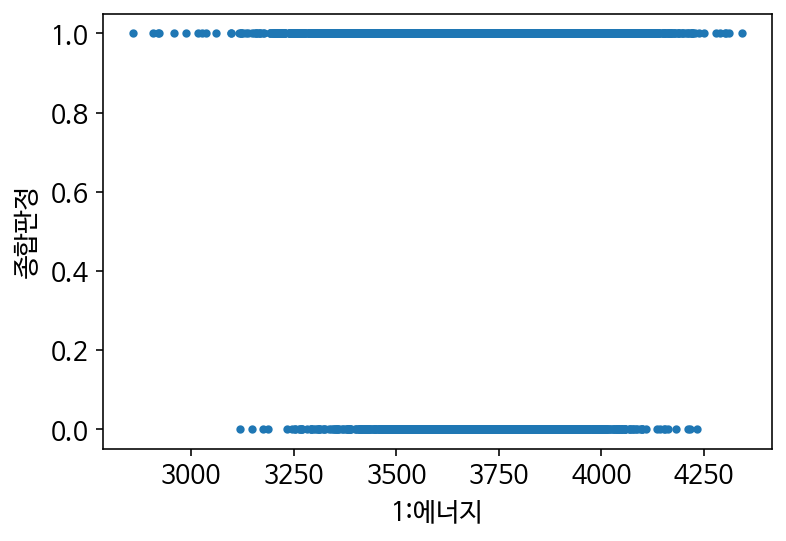

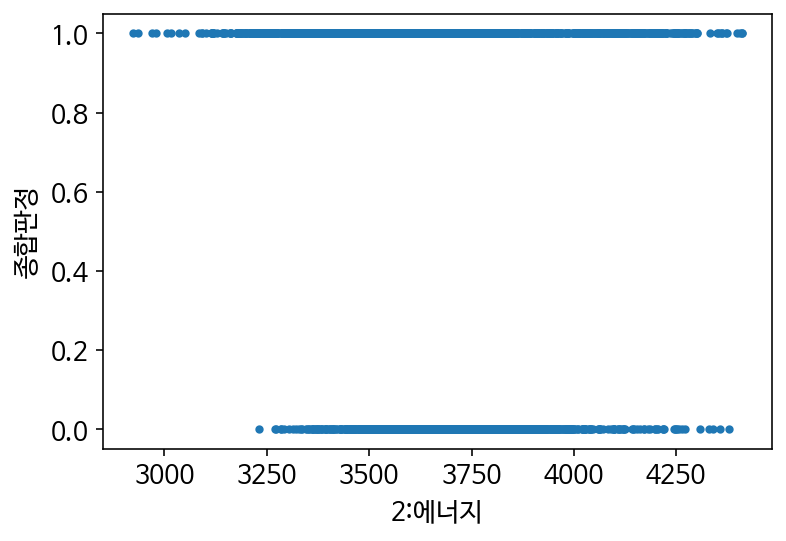

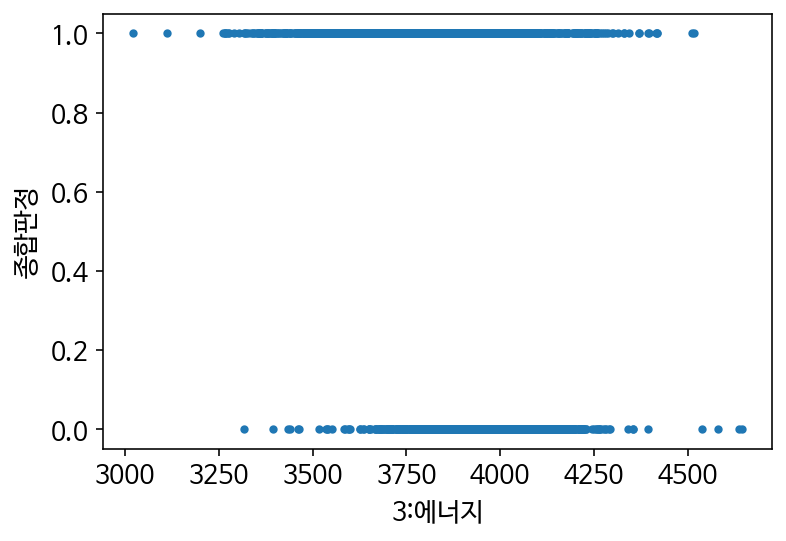

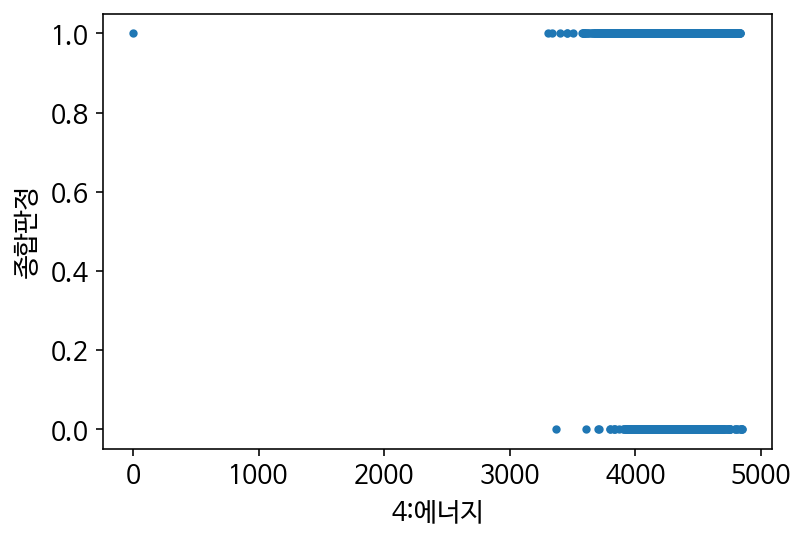

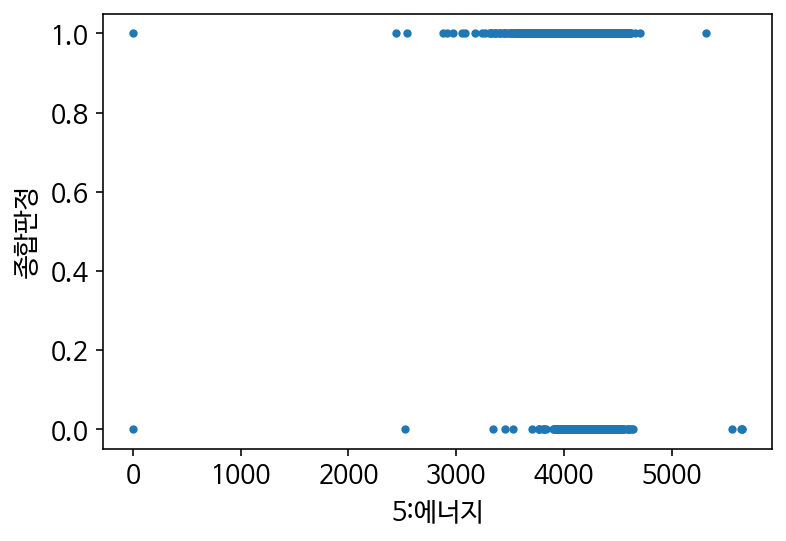

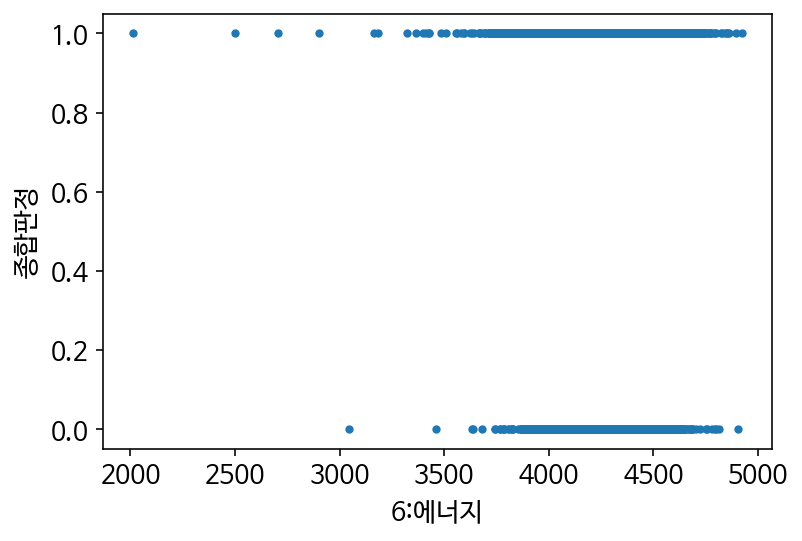

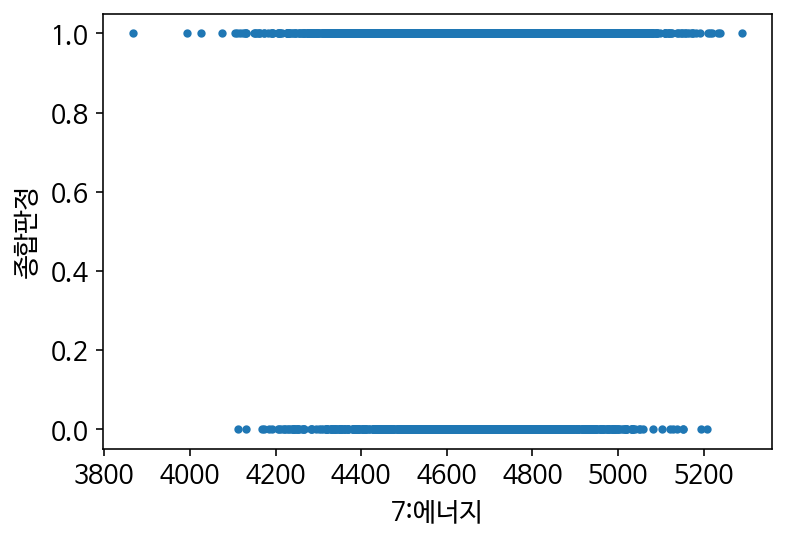

In [329]:
for col in ["1:에너지", "2:에너지","3:에너지","4:에너지","5:에너지", "6:에너지","7:에너지"]:
    plt.scatter(df2[col] , df2['종합판정'], s=10)
    plt.ylabel('종합판정')
    plt.xlabel(col)
    plt.show()

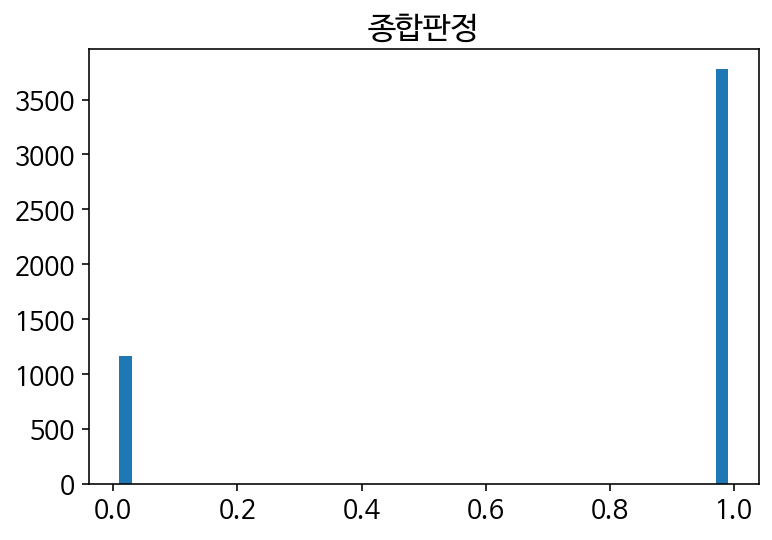

In [330]:
for col in ["종합판정"]:
    plt.hist(df2[col], bins=25, rwidth=0.5)
    plt.title(col)
    plt.show()

In [331]:
## 훈련 데이터와 검증 데이터 준비

features = df2.columns.difference(["라인", "생성일시", "바코드","종합판정", "판정", "하부", "판정.1", "좌측", "판정.2", "우측", "판정.3","상부",
       '1:에너지1', '1:최대출력1', '1:평균출력',
       '2:에너지1', '2:최대출력1', '2:평균출력',
       '3:에너지1', '3:최대출력1', '3:평균출력',
       '4:에너지1', '4:최대출력1', '4:평균출력',
       '5:에너지1', '5:최대출력1', '5:평균출력',
       '6:에너지1', '6:최대출력1', '6:평균출력',
       '7:에너지1', '7:최대출력1', '7:평균출력',
       '8:에너지1', '8:최대출력1', '8:평균출력',
       '9:에너지1', '9:최대출력1', '9:평균출력',
       '10:에너지1', '10:최대출력1', '10:평균출력',
       '11:에너지1', '11:최대출력1', '11:평균출력',
       '12:에너지1', '12:최대출력1', '12:평균출력',
       '13:에너지1', '13:최대출력1', '13:평균출력',
       '14:에너지1', '14:최대출력1', '14:평균출력',
       '15:에너지1', '15:최대출력1', '15:평균출력',
       '16:에너지1', '16:최대출력1', '16:평균출력',
       '17:에너지1', '17:최대출력1', '17:평균출력',
       '18:에너지1', '18:최대출력1', '18:평균출력',
       '19:에너지1', '19:최대출력1', '19:평균출력',
       '20:에너지1', '20:최대출력1', '20:평균출력',
       '21:에너지1', '21:최대출력1', '21:평균출력',
       '22:에너지1', '22:최대출력1', '22:평균출력',
       '23:에너지1', '23:최대출력1', '23:평균출력',
       '24:에너지1', '24:최대출력1', '24:평균출력',
      ])
X = df2[features]
y = df2["종합판정"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 , random_state=9, shuffle=True)

In [332]:
X_train.shape, y_train.shape, X_test.shape

((3948, 72), (3948,), (988, 72))

In [333]:
y[0:10]

0    1
1    0
2    0
3    0
4    0
5    1
6    0
7    1
8    1
9    1
Name: 종합판정, dtype: int64

In [334]:
X_train.sort_values(by='1:에너지',ascending=False)

,10:에너지,10:최대출력,10:평균출력1,11:에너지,11:최대출력,11:평균출력1,12:에너지,12:최대출력,12:평균출력1,13:에너지,13:최대출력,13:평균출력1,14:에너지,14:최대출력,14:평균출력1,15:에너지,15:최대출력,15:평균출력1,16:에너지,16:최대출력,16:평균출력1,17:에너지,17:최대출력,17:평균출력1,18:에너지,18:최대출력,18:평균출력1,19:에너지,19:최대출력,19:평균출력1,1:에너지,1:최대출력,1:평균출력1,20:에너지,20:최대출력,20:평균출력1,21:에너지,21:최대출력,21:평균출력1,22:에너지,22:최대출력,22:평균출력1,23:에너지,23:최대출력,23:평균출력1,24:에너지,24:최대출력,24:평균출력1,2:에너지,2:최대출력,2:평균출력1,3:에너지,3:최대출력,3:평균출력1,4:에너지,4:최대출력,4:평균출력1,5:에너지,5:최대출력,5:평균출력1,6:에너지,6:최대출력,6:평균출력1,7:에너지,7:최대출력,7:평균출력1,8:에너지,8:최대출력,8:평균출력1,9:에너지,9:최대출력,9:평균출력1
1266,3023,1935,1811,3071,2094,1853,3026,2158,1887,2590,1996,1996,2656,1950,1514,2074,1330,1192,3366,2060,2029,3501,2362,2090,3440,2185,2055,3382,2198,1992,4342,2463,2312,3584,2244,2122,3463,2223,2039,3369,2081,2020,3384,2186,2078,2066,1370,1270,3624,2185,1964,4029,2340,2216,4573,2553,2496,3977,2498,2140,4409,2637,2339,4807,2787,2602,2736,1758,1639,3243,2201,1944
1496,2684,1797,1626,3015,1898,1769,3209,2092,1930,2840,2064,2064,2511,1771,1437,2133,1353,1230,3318,2040,1995,3371,2331,1989,3375,2123,2028,3280,2060,1958,4311,2409,2292,3601,2312,2129,3515,2138,2092,3239,2196,2006,3146,2142,1939,1949,1197,1125,3806,2371,2078,3893,2231,2087,4337,2517,2330,4094,2538,2179,4355,2583,2263,4585,2744,2477,2426,1649,1439,3211,2136,1925
1198,3094,1882,1823,2976,1931,1736,2917,1946,1788,2773,2071,2071,2431,1421,1279,2197,1446,1289,3341,2030,1973,3520,2424,2101,3502,2171,2108,3544,2199,2047,4302,2542,2306,3657,2353,2142,3543,2199,2075,3343,2078,1997,3327,2173,1965,2136,1332,1285,3807,2410,2110,4106,2325,2217,4566,2636,2442,4475,2486,2448,4745,2545,2456,4943,2729,2637,2817,1862,1736,3327,2305,1988
806,2680,2082,1649,2900,1902,1738,2972,2084,1826,2762,1888,1856,2580,1831,1474,2140,1325,1244,3250,2026,1969,3430,2288,2066,3393,2104,2049,3346,2054,1992,4290,2463,2297,3598,2320,2133,3605,2222,2160,3221,2039,1910,3289,2133,2001,2080,1218,1189,3817,2249,2059,4075,2358,2190,4616,2673,2507,4192,2495,2268,4406,2639,2288,5082,2910,2712,2553,1703,1491,3234,2326,2007
1208,3159,1959,1887,3088,2176,1885,3196,2006,1928,2772,1964,1964,2498,1446,1287,2100,1470,1222,3349,2076,1995,3566,2361,2134,3332,2121,1970,3564,2255,2092,4250,2526,2283,3555,2189,2086,3463,2217,2068,3264,2053,1958,3479,2169,2088,2088,1312,1251,3753,2429,2079,4046,2327,2197,4836,2794,2582,4474,2527,2462,4734,2555,2464,5028,2866,2703,2734,1642,1590,3244,2259,1932
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481,2478,1664,1472,2738,1842,1690,2922,1922,1815,2009,1630,1630,2249,1627,1299,1894,1189,1129,3149,1968,1910,3502,2339,2125,2929,2028,1834,2951,1849,1771,2959,1809,1619,3485,2290,2055,3526,2266,2153,3135,2086,1907,3165,2118,1963,1942,1152,1134,3257,1974,1757,3354,2048,1847,3844,2233,2044,3985,2186,2122,3820,2082,1977,4510,2605,2491,2323,1579,1352,2737,1813,1644
474,2527,1752,1523,2798,1786,1638,2980,1973,1826,2355,1711,1711,2137,1627,1232,1896,1150,1113,3351,2080,2049,3582,2360,2148,3109,2137,1931,3105,1961,1852,2922,1792,1582,3608,2355,2122,3532,2272,2128,3143,2080,1922,3257,2182,2009,1845,1199,1112,3015,1890,1643,3277,2155,1826,3740,2241,2009,3888,2361,2155,4068,2335,2162,4610,2730,2499,2257,1599,1338,2787,1871,1619
388,3504,2181,2073,2836,1834,1720,3057,1987,1852,2475,1726,1726,2291,1761,1340,1746,1146,1043,3380,2096,2045,3461,2294,2085,3387,2172,2098,3285,2074,1926,2919,1858,1575,3669,2291,2142,3521,2227,2084,3410,2132,2028,3431,2194,2056,1658,1069,1011,2923,1885,1647,3462,2167,1903,3890,2199,2083,4129,2408,2308,4312,2441,2248,4935,2753,2641,2374,1699,1438,3017,2055,1835
402,3529,2534,2146,2732,1997,1656,2724,1853,1677,2583,1804,1804,2365,1744,1373,1969,1213,1163,3312,2006,1986,3404,2220,2018,3290,2091,2019,3136,2009,1910,2908,1686,1568,3770,2360,2222,3475,2209,2060,3330,2156,2009,3260,2176,2019,1981,1281,119

In [335]:
np.unique(y_train, return_counts=True)

(array([0, 1]), array([ 915, 3033]))

In [336]:
from imblearn.over_sampling import SMOTE, SMOTENC, ADASYN, RandomOverSampler
smote = SMOTE(random_state=9)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)
X_train_over.shape, y_train_over.shape

((6066, 72), (6066,))

In [337]:
np.unique(y_train_over, return_counts=True)

(array([0, 1]), array([3033, 3033]))

In [338]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth = 20)

In [339]:
# Fit the classifier to the training data
rf.fit(X_train , y_train)
# Compute accuracy on training dataset
rf.score(X_train , y_train)

0.9987335359675785

In [340]:
predictions = rf.predict(X_test)
# Compute accuracy on test dataset
rf.score(X_test , y_test)

0.8734817813765182

In [341]:
accuracy_score(y_test , predictions)

0.8734817813765182

In [342]:
def plot_feature_weight(feature, weight):
    plt.figure(figsize=(5,8))
    W = pd.DataFrame({'feature':feature,'weight':weight})
    W.sort_values('weight', inplace=True)
    plt.barh(W.feature, W.weight)

In [297]:
def show_reg_result(y_test,y_pred):
    print("Max Error: ", 
      round(np.abs(y_test - y_pred).max(),3))
    print("Mean Absolute Error: ", 
      round(np.abs(y_test-y_pred).mean(),3))
    print("Root Mean Squared Error: ", 
      mean_squared_error(y_test,y_pred, squared=False).round(3))
    print("R-Squared: ", 
      r2_score(y_test, y_pred).round(3))

0.768


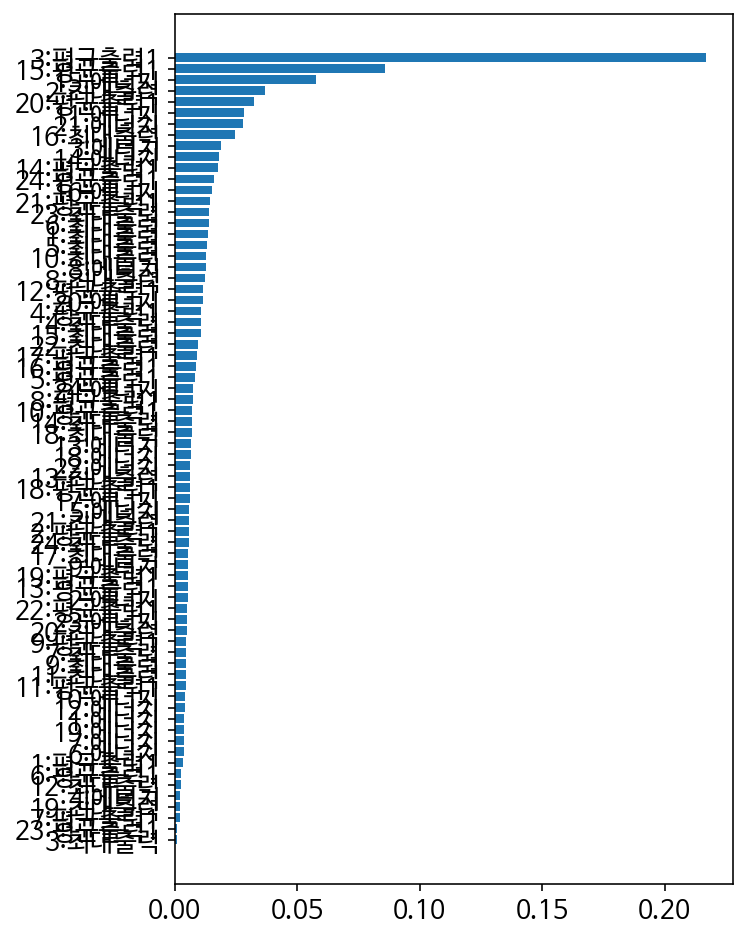

In [343]:
## 랜덤 포레스트 모델 성능 확인

dtc = DecisionTreeClassifier(max_depth=20) 
dtc.fit(X_train_over, y_train_over) 
print(dtc.score(X_test, y_test).round(3)) 

plot_feature_weight(X.columns, dtc.feature_importances_)


In [344]:
def show_clf_result(y_test, y_pred):
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

y_pred = dtc.predict(X_test)
show_clf_result(y_test, y_pred)

[[159  87]
 [142 600]]
              precision    recall  f1-score   support

           0       0.53      0.65      0.58       246
           1       0.87      0.81      0.84       742

    accuracy                           0.77       988
   macro avg       0.70      0.73      0.71       988
weighted avg       0.79      0.77      0.78       988



In [345]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix, classification_report,roc_curve, roc_auc_score
from sklearn.metrics import plot_precision_recall_curve,precision_recall_curve, average_precision_score
from imblearn.over_sampling import SMOTE, SMOTENC, ADASYN, RandomOverSampler

In [354]:
result = []

In [355]:
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
y_pred = lr_clf.predict(X_test)
show_clf_result(y_test, y_pred)

result.append(('logistic-regression', precision_score(y_test, y_pred), recall_score(y_test, y_pred)))
result

[[143 103]
 [ 29 713]]
              precision    recall  f1-score   support

           0       0.83      0.58      0.68       246
           1       0.87      0.96      0.92       742

    accuracy                           0.87       988
   macro avg       0.85      0.77      0.80       988
weighted avg       0.86      0.87      0.86       988



[('logistic-regression', 0.8737745098039216, 0.9609164420485176)]

In [356]:
rfc = RandomForestClassifier(n_estimators=30)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

show_clf_result(y_test, y_pred)
result.append(('random-forest',
    precision_score(y_test, y_pred), recall_score(y_test, y_pred)))
result

[[144 102]
 [ 19 723]]
              precision    recall  f1-score   support

           0       0.88      0.59      0.70       246
           1       0.88      0.97      0.92       742

    accuracy                           0.88       988
   macro avg       0.88      0.78      0.81       988
weighted avg       0.88      0.88      0.87       988



[('logistic-regression', 0.8737745098039216, 0.9609164420485176),
 ('random-forest', 0.8763636363636363, 0.9743935309973046)]

In [357]:
lgbm_clf = LGBMClassifier(n_estimators=100,boost_from_average=False)
lgbm_clf.fit(X_train, y_train)
y_pred = lgbm_clf.predict(X_test)
show_clf_result(y_test, y_pred)

result.append(('lightgbm',
    precision_score(y_test, y_pred), recall_score(y_test, y_pred)))
result

[[150  96]
 [ 17 725]]
              precision    recall  f1-score   support

           0       0.90      0.61      0.73       246
           1       0.88      0.98      0.93       742

    accuracy                           0.89       988
   macro avg       0.89      0.79      0.83       988
weighted avg       0.89      0.89      0.88       988



[('logistic-regression', 0.8737745098039216, 0.9609164420485176),
 ('random-forest', 0.8763636363636363, 0.9743935309973046),
 ('lightgbm', 0.8830694275274056, 0.977088948787062)]

In [358]:
lr_clf = LogisticRegression()
lr_clf.fit(X_train_over, y_train_over)
y_pred = lr_clf.predict(X_test)
show_clf_result(y_test, y_pred)

result.append(('log-reg-SMOTE',
    precision_score(y_test, y_pred), recall_score(y_test, y_pred)))
result

[[174  72]
 [151 591]]
              precision    recall  f1-score   support

           0       0.54      0.71      0.61       246
           1       0.89      0.80      0.84       742

    accuracy                           0.77       988
   macro avg       0.71      0.75      0.73       988
weighted avg       0.80      0.77      0.78       988



[('logistic-regression', 0.8737745098039216, 0.9609164420485176),
 ('random-forest', 0.8763636363636363, 0.9743935309973046),
 ('lightgbm', 0.8830694275274056, 0.977088948787062),
 ('log-reg-SMOTE', 0.8914027149321267, 0.7964959568733153)]

In [359]:
lgbm_clf.fit(X_train_over, y_train_over)
y_pred = lgbm_clf.predict(X_test)
show_clf_result(y_test, y_pred)

result.append(('lgbm-SMOTE',
    precision_score(y_test, y_pred), recall_score(y_test, y_pred)))
result

[[166  80]
 [ 49 693]]
              precision    recall  f1-score   support

           0       0.77      0.67      0.72       246
           1       0.90      0.93      0.91       742

    accuracy                           0.87       988
   macro avg       0.83      0.80      0.82       988
weighted avg       0.87      0.87      0.87       988



[('logistic-regression', 0.8737745098039216, 0.9609164420485176),
 ('random-forest', 0.8763636363636363, 0.9743935309973046),
 ('lightgbm', 0.8830694275274056, 0.977088948787062),
 ('log-reg-SMOTE', 0.8914027149321267, 0.7964959568733153),
 ('lgbm-SMOTE', 0.8965071151358344, 0.9339622641509434)]

In [166]:
|## 결정 트리를 이용한 회귀 예측

# 최적의 트리 깊이 (max_depth)를 실험으로 찾는다
res = []
for depth in range(1,30):
    dtr = DecisionTreeRegressor(max_depth=depth) 
    dtr.fit(X_train, y_train) 
    res.append((depth, dtr.score(X_test, y_test).round(4))) 

df_res = pd.DataFrame(res, columns=['depth','R-squared']).set_index('depth')
print('depth: ',df_res.idxmax()[0], ', R-squared: ',df_res.max()[0])
df_res.plot()

SyntaxError: ignored

In [ ]:
def plot_feature_weight(feature, weight):
    plt.figure(figsize=(5,8))
    W = pd.DataFrame({'feature':feature,'weight':weight})
    W.sort_values('weight', inplace=True)
    plt.barh(W.feature, W.weight)

In [ ]:
def show_reg_result(y_test,y_pred):
    print("Max Error: ", 
      round(np.abs(y_test - y_pred).max(),3))
    print("Mean Absolute Error: ", 
      round(np.abs(y_test-y_pred).mean(),3))
    print("Root Mean Squared Error: ", 
      mean_squared_error(y_test,y_pred, squared=False).round(3))
    print("R-Squared: ", 
      r2_score(y_test, y_pred).round(3))

Max Error:  2.955
Mean Absolute Error:  0.502
Root Mean Squared Error:  0.706
R-Squared:  -0.25


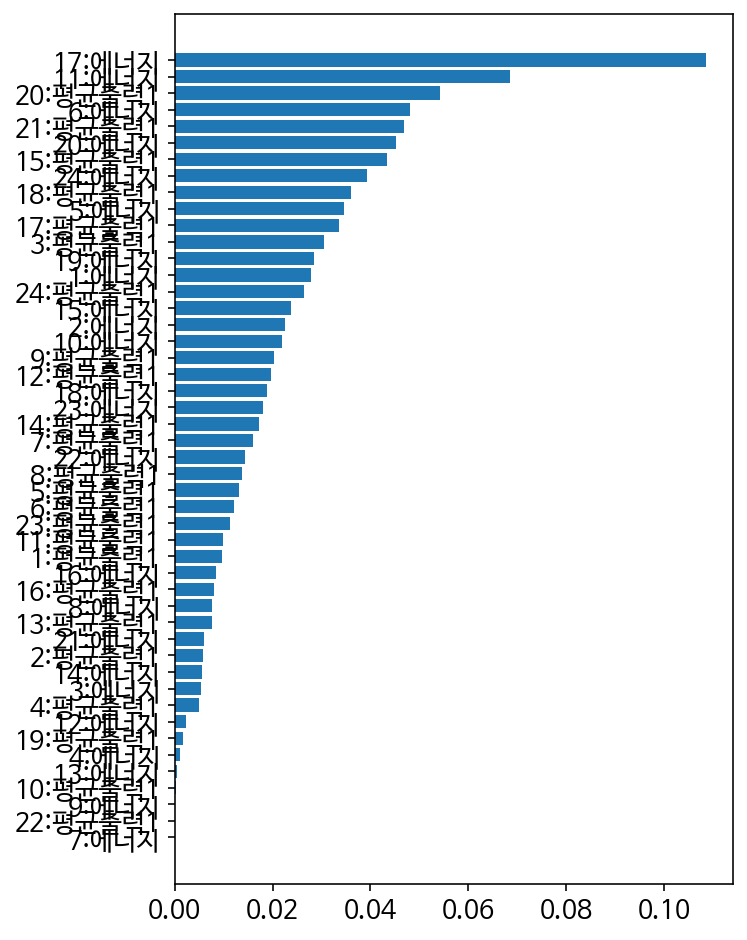

In [ ]:
## 결정 트리 모델 성능 확인

dtr = DecisionTreeRegressor(max_depth=8)
dtr.fit(X_train, y_train)
y_pred = dtr.predict(X_test)
show_reg_result(y_test,y_pred)

plot_feature_weight(X.columns, dtr.feature_importances_)

depth:  21 , R-squared:  0.215


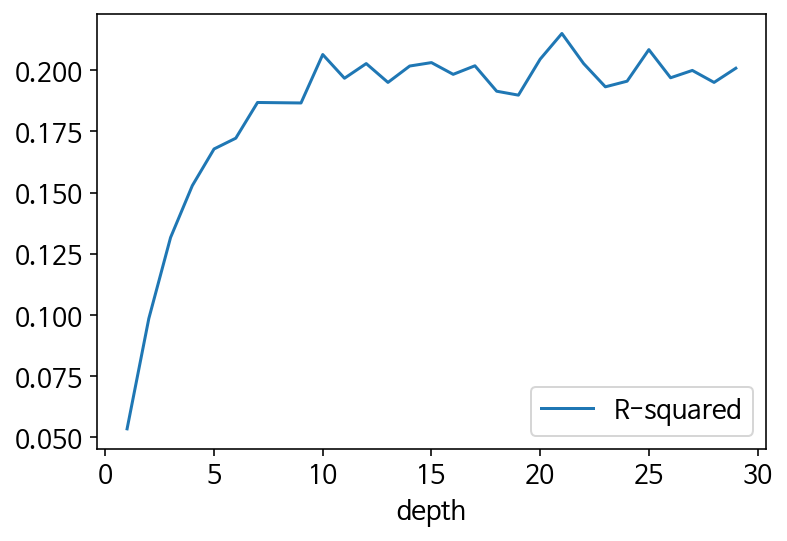

In [ ]:
## 랜덤 포레스트를 이용한 회귀 예측

# 최적의 트리 깊이 (max_depth)를 실험으로 찾는다
res = []
for depth in range(1,30):
    rfr = RandomForestRegressor(max_depth=depth) 
    rfr.fit(X_train, y_train) 
    res.append((depth, rfr.score(X_test, y_test).round(4))) 

df_res = pd.DataFrame(res, columns=['depth','R-squared']).set_index('depth')
print('depth: ',df_res.idxmax()[0], ', R-squared: ',df_res.max()[0])
df_res.plot()

Max Error:  2.063
Mean Absolute Error:  0.424
Root Mean Squared Error:  0.565
R-Squared:  0.201


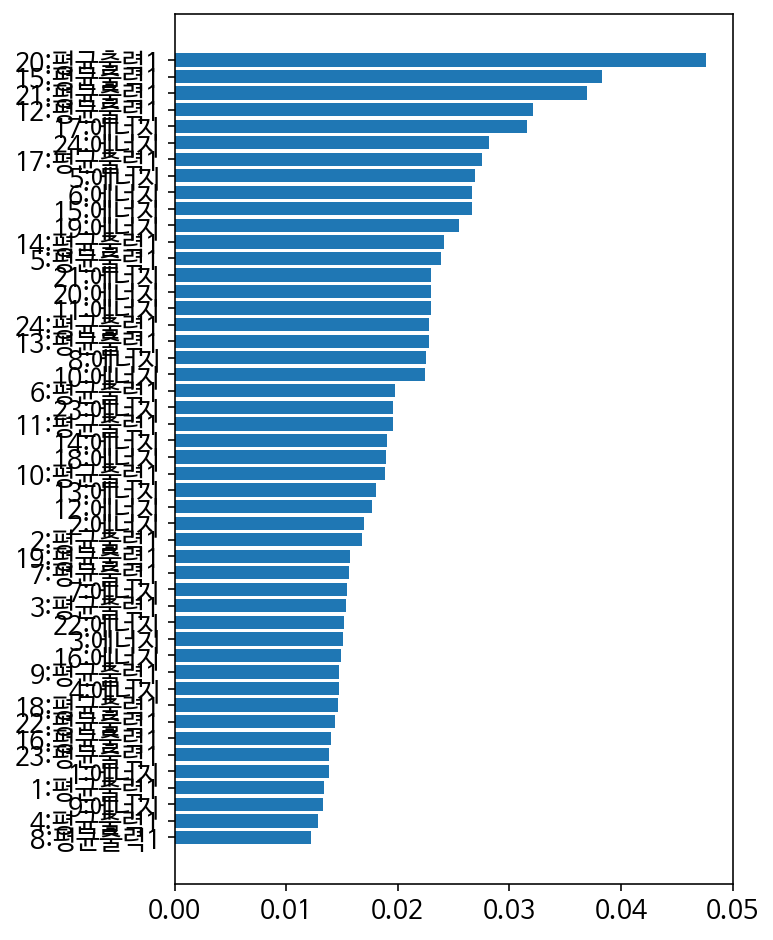

In [ ]:
## 랜덤 포레스트 모델 성능 확인

rfr = RandomForestRegressor(max_depth=18)
rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_test)
show_reg_result(y_test,y_pred)

plot_feature_weight(X.columns, rfr.feature_importances_)

depth:  5 , R-squared:  0.2259


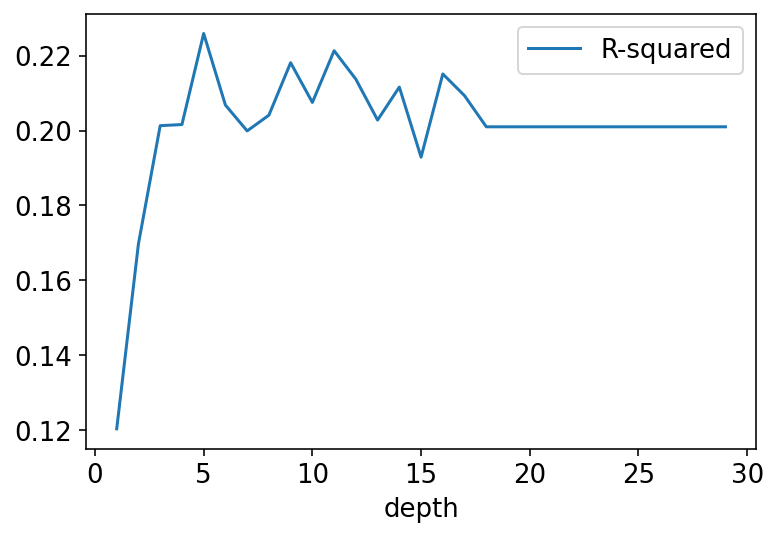

In [ ]:
## LightGBM 부스팅 모델을 이용한 회귀 예측

# 최적의 트리 깊이 (max_depth)를 실험으로 찾는다
res = []
for depth in range(1,30):
    lgbm_r = LGBMRegressor(max_depth=depth, num_leaves=32) 
    lgbm_r.fit(X_train, y_train, eval_set=(X_test, y_test), 
           early_stopping_rounds=5, verbose=False)
    res.append((depth, lgbm_r.score(X_test, y_test).round(4))) 

df_res = pd.DataFrame(res, columns=['depth','R-squared']).set_index('depth')
print('depth: ',df_res.idxmax()[0], ', R-squared: ',df_res.max()[0])
df_res.plot()

Max Error:  1.938
Mean Absolute Error:  0.424
Root Mean Squared Error:  0.565
R-Squared:  0.201


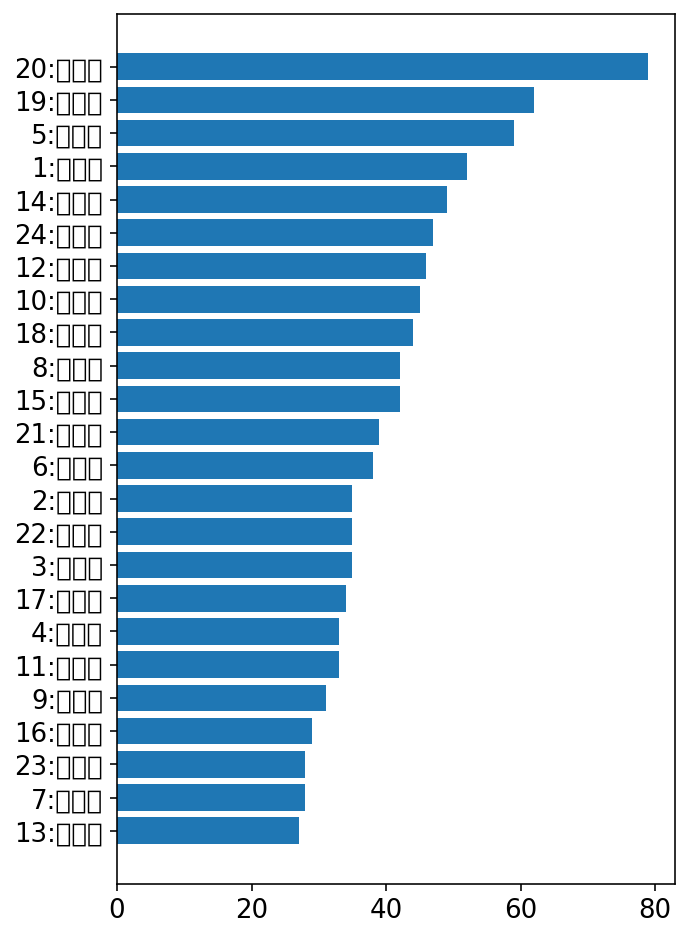

In [ ]:
## 부스팅 모델 성능 확인

lgbm_r = LGBMRegressor(max_depth=19, num_leaves=32)
lgbm_r.fit(X_train, y_train, eval_set=(X_test, y_test), 
           early_stopping_rounds=5, verbose=False)
y_pred = lgbm_r.predict(X_test)
show_reg_result(y_test,y_pred)

plot_feature_weight(X.columns, lgbm_r.feature_importances_)

In [ ]:
y_test

2302   -1.15
204    -1.63
2503   -1.30
2523   -1.23
1528   -1.95
        ... 
1464   -1.22
304    -3.19
2419    0.01
224    -0.93
1095   -1.38
Name: 상부, Length: 1077, dtype: float64

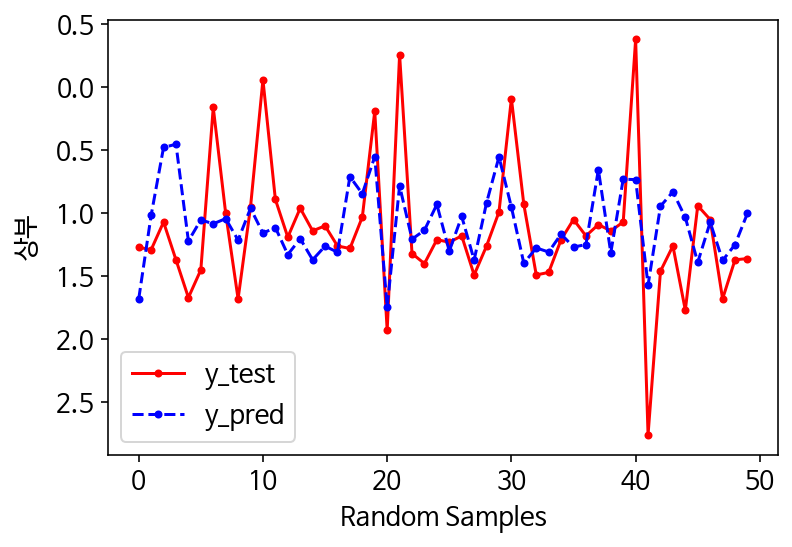

In [ ]:
## 회귀 예측과 실제값 샘플 비교하기

def plot_reg_result(y_test, y_pred, N=50):
    y_test = y_test.values
    plt.plot(y_test[:N], 'r.-', label='y_test')
    plt.plot(y_pred[:N], 'b.--', label='y_pred')
    plt.legend()
    plt.xlabel("Random Samples")
    plt.ylabel("상부")
    plt.show()

y_pred = lgbm_r.predict(X_test)
plot_reg_result(y_test, y_pred)